In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
import random as rand
from scipy import signal

1000


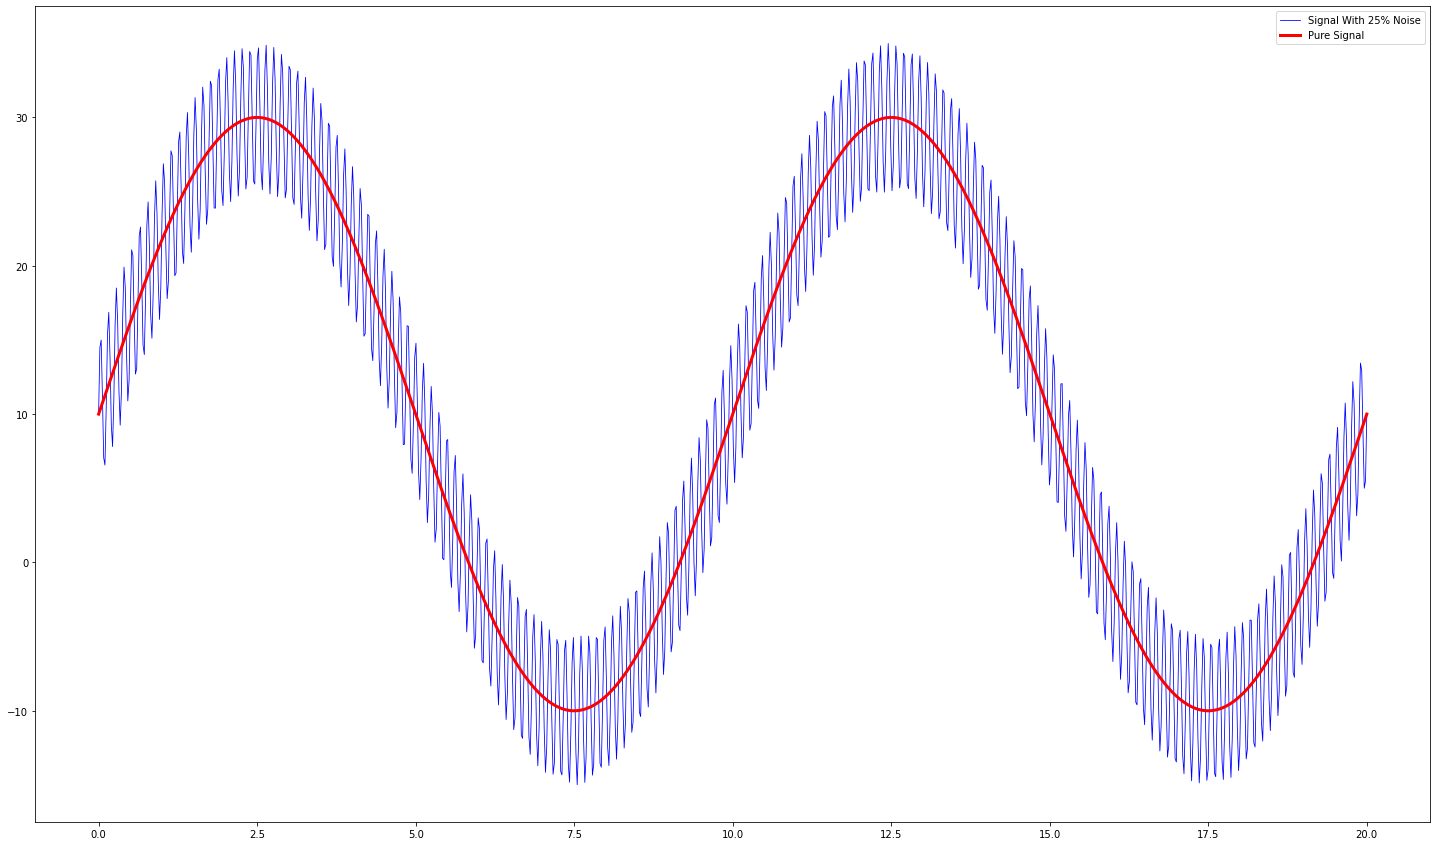

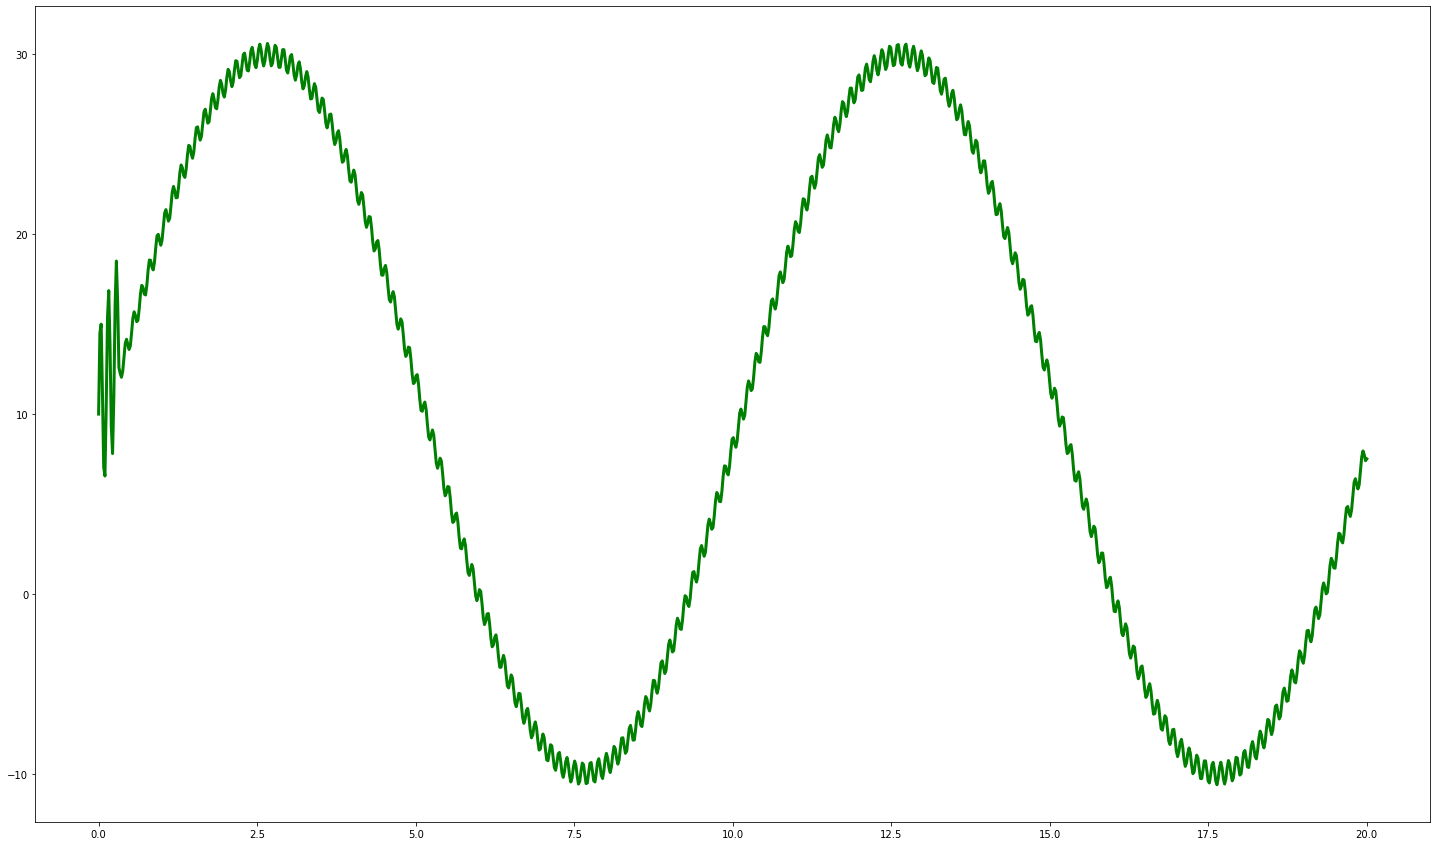

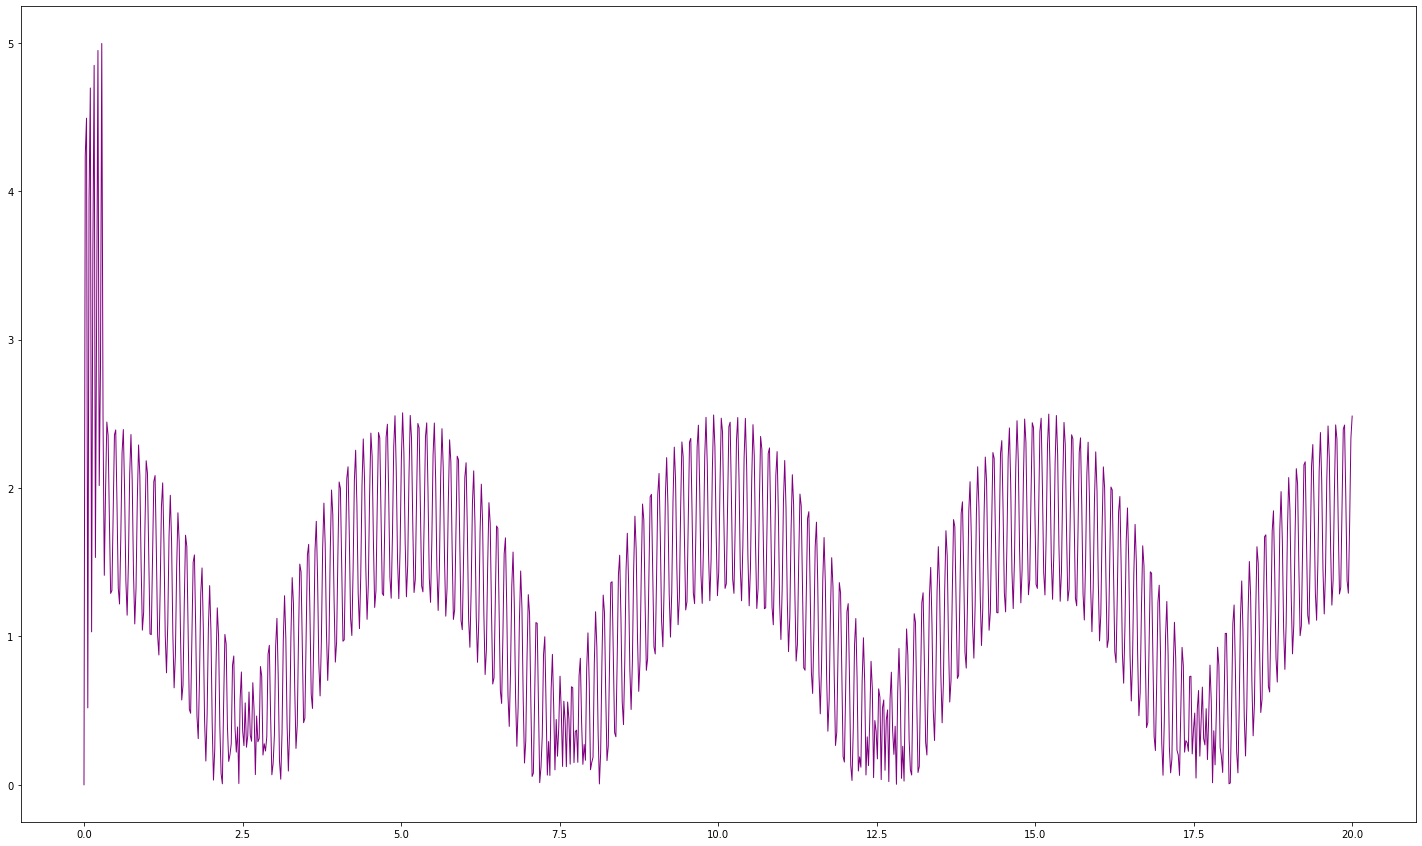

In [161]:
fSignal = 0.1 #signal frequency
fNoise = 58.0 #noise frequency

Amplitude = 20 #signal amplitude
offset = 10 #offset the signal value
PhaseShift = 0

NoisePercentage = 0.25 #percentage of amplitude that appears as noise

resolution = 1000

def createSine(f, Vm, Qv, offset): #make a sine wave
    w = 2*mt.pi*f
    time = np.linspace(0,20,resolution)
    signal = np.zeros([resolution])
    for i in range(0, resolution):
        signal[i] = Vm * mt.sin(w*time[i] + Qv) + offset
    return signal, time

def createNoise(f, Vm, Qv): #make a noise sine wave
    noise, time = createSine(f, Vm*NoisePercentage, Qv, 0)
    return noise, time

def MovingAverage(signal): #moving avg filter of size 16
    order = 16
    processed = np.zeros((signal.size))
    processed[:order] = signal[:order]
    for i in range(order, signal.size):
        processed[i] = (signal[i] + signal[i-1] + signal[i-2] + signal[i-3] + signal[i-4] + signal[i-5] + signal[i-6] + signal[i-7] + signal[i-8] + signal[i-9] + signal[i-10] + signal[i-11] + signal[i-12] + signal[i-13] + signal[i-14] + signal[i-15])/order
    return processed

def calculateDifference(signal, estimate):
    difference = np.zeros((signal.size))
    for i in range(0, signal.size):
        difference[i] = abs(signal[i] - estimate[i])
    return difference

#Create a simulation of a signal rising and falling from -10 to 30
mySignal, myTime = createSine(fSignal, Amplitude, PhaseShift, offset)
myNoise, myTimeNoise = createNoise(fNoise, Amplitude, PhaseShift)
myResult = mySignal + myNoise #combine noise and signal

#plot noise and signal
plt.plot(myTime, myResult, c='b', label='Signal With 25% Noise',linewidth=0.8)
plt.plot(myTime, mySignal, c='r', label='Pure Signal',linewidth=3.0)
plt.legend()
plt.figure()

print(myResult.size)
myResult = MovingAverage(myResult)
plt.plot(myTime, myResult, c='g', label='Filtered Signal',linewidth=3.0)
plt.figure()

error = calculateDifference(mySignal, myResult)
plt.plot(myTime, error, c='purple', label='Error',linewidth=1.0)

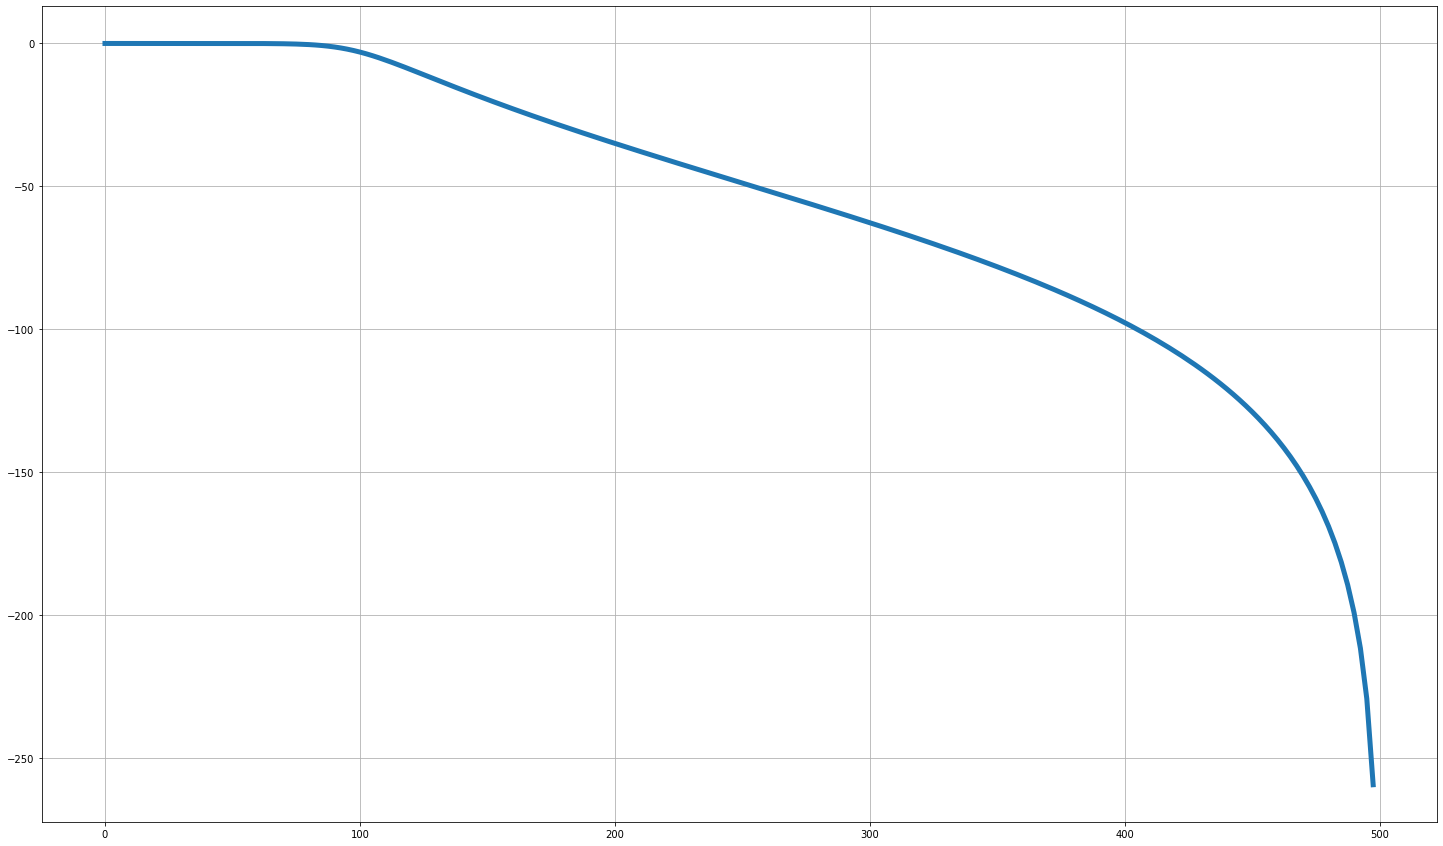

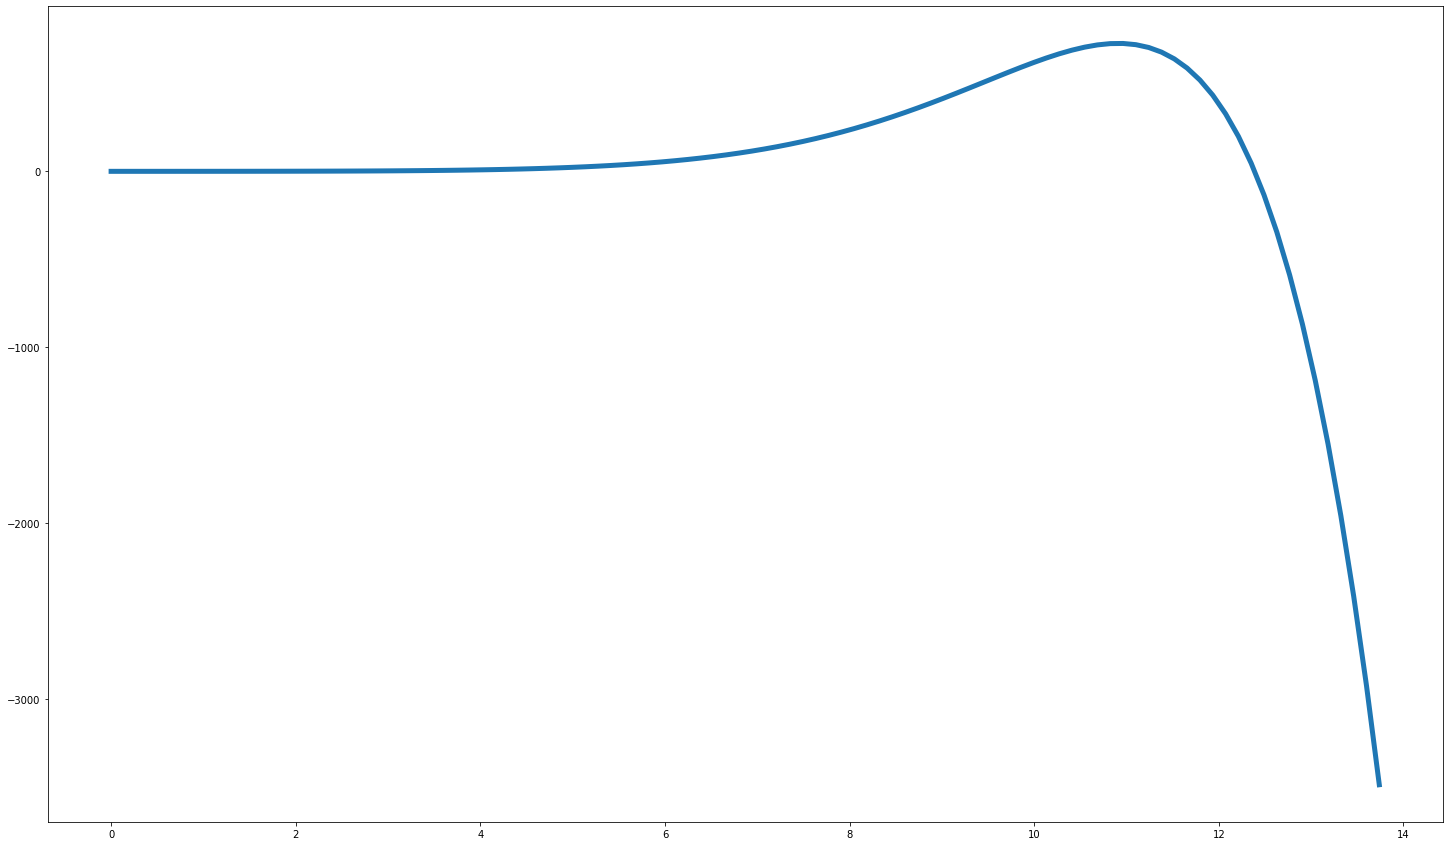

In [119]:
import scipy.signal as sig
# IIR butterworth filter frequency and impulse response
plt.close('all')

Fs = 1000 #sample freq
n = 5 #filter order
fc = 100 #cutoff freq
w_c = 2*fc/Fs #normalize freq
b, a = sig.butter(n, w_c, btype = 'lowpass') # low pass filter
system = ([b, a])

#freq response of high pass
w, h = sig.freqz(b, a, worN = 200)
w = Fs*w/(2*mt.pi)

t, y = sig.impulse(system) #get impulse response
h_db = 20*np.log10(abs(h))

plt.figure()
plt.plot(w, h_db, linewidth = 5) #plot freq response
plt.grid('on')

plt.figure()
plt.plot(t, y, linewidth = 5) #plot impulse response


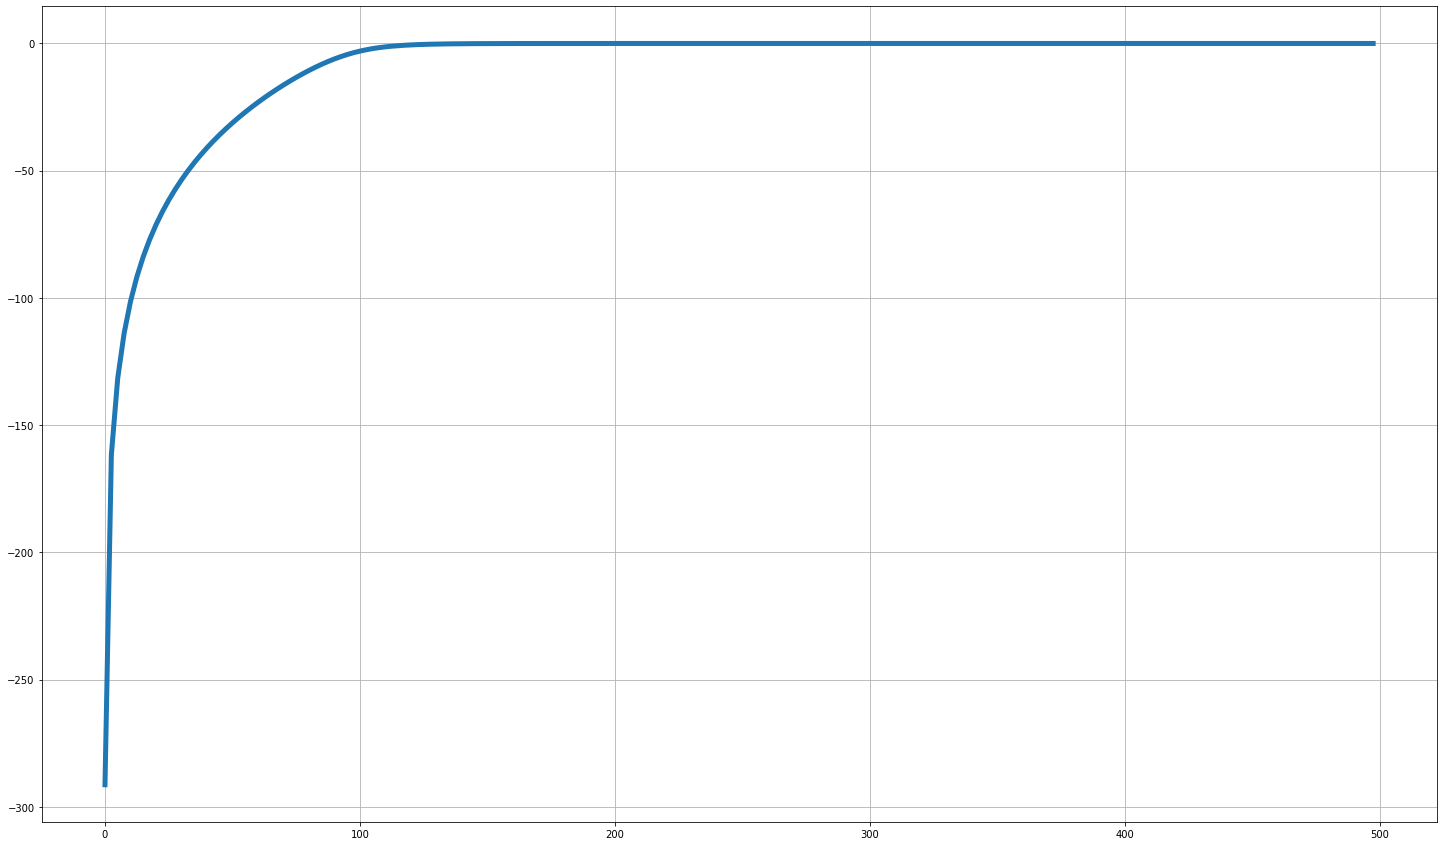

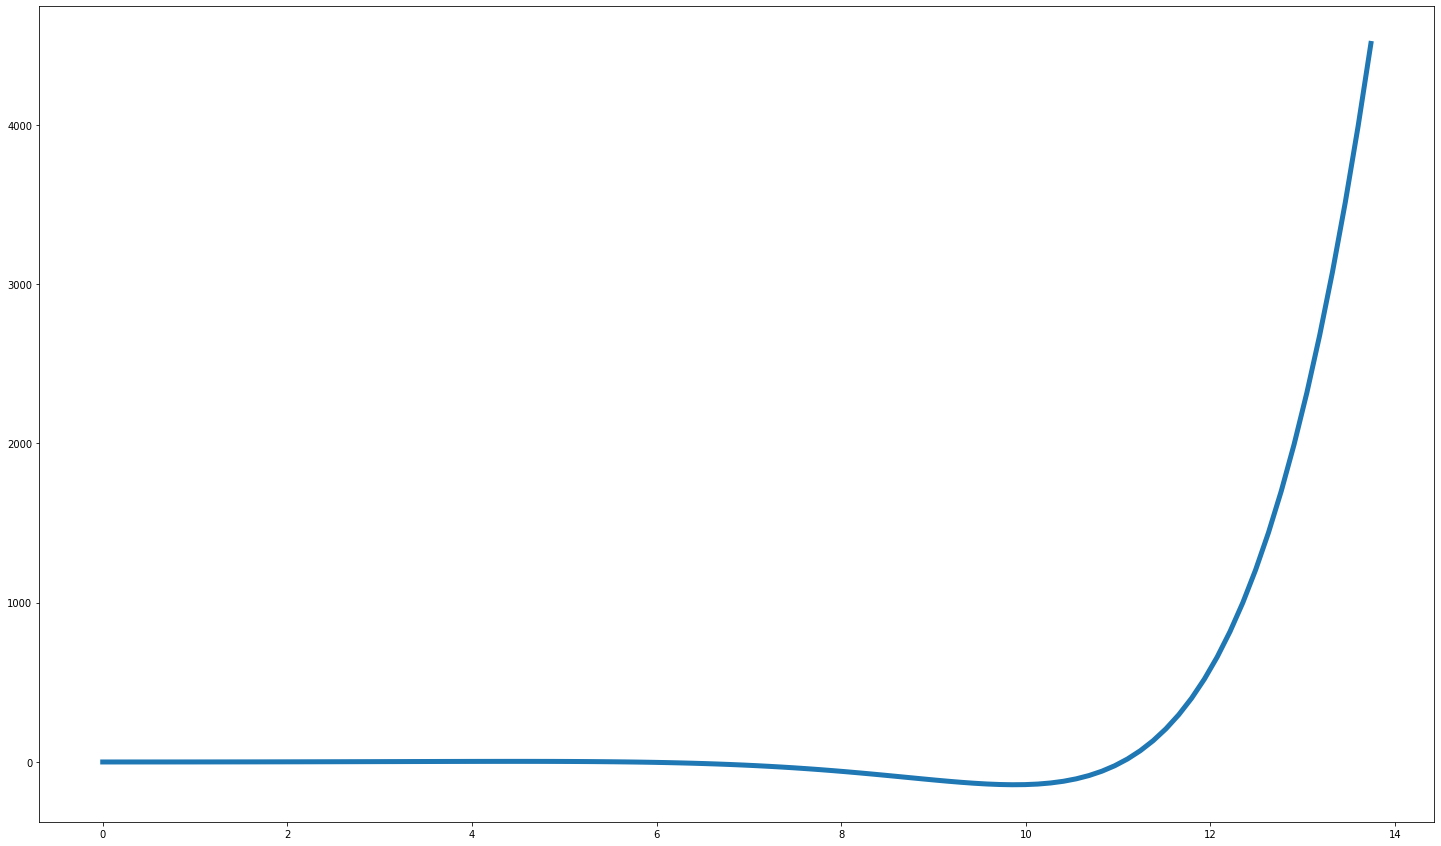

In [120]:
Fs = 1000 #sample freq
n = 5 #filter order
fc = 100 #cutoff freq
w_c = 2*fc/Fs #normalize freq
b, a = sig.butter(n, w_c, btype = 'highpass') # highpass filter
system = ([b, a])

#freq response of high pass
w, h = sig.freqz(b, a, worN = 200)
w = Fs*w/(2*mt.pi)

t, y = sig.impulse(system) #get impulse response
h_db = 20*np.log10(abs(h))

plt.figure()
plt.plot(w, h_db, linewidth = 5)# plot freq response
plt.grid('on')

plt.figure()
plt.plot(t, y, linewidth = 5)# plot impulse response

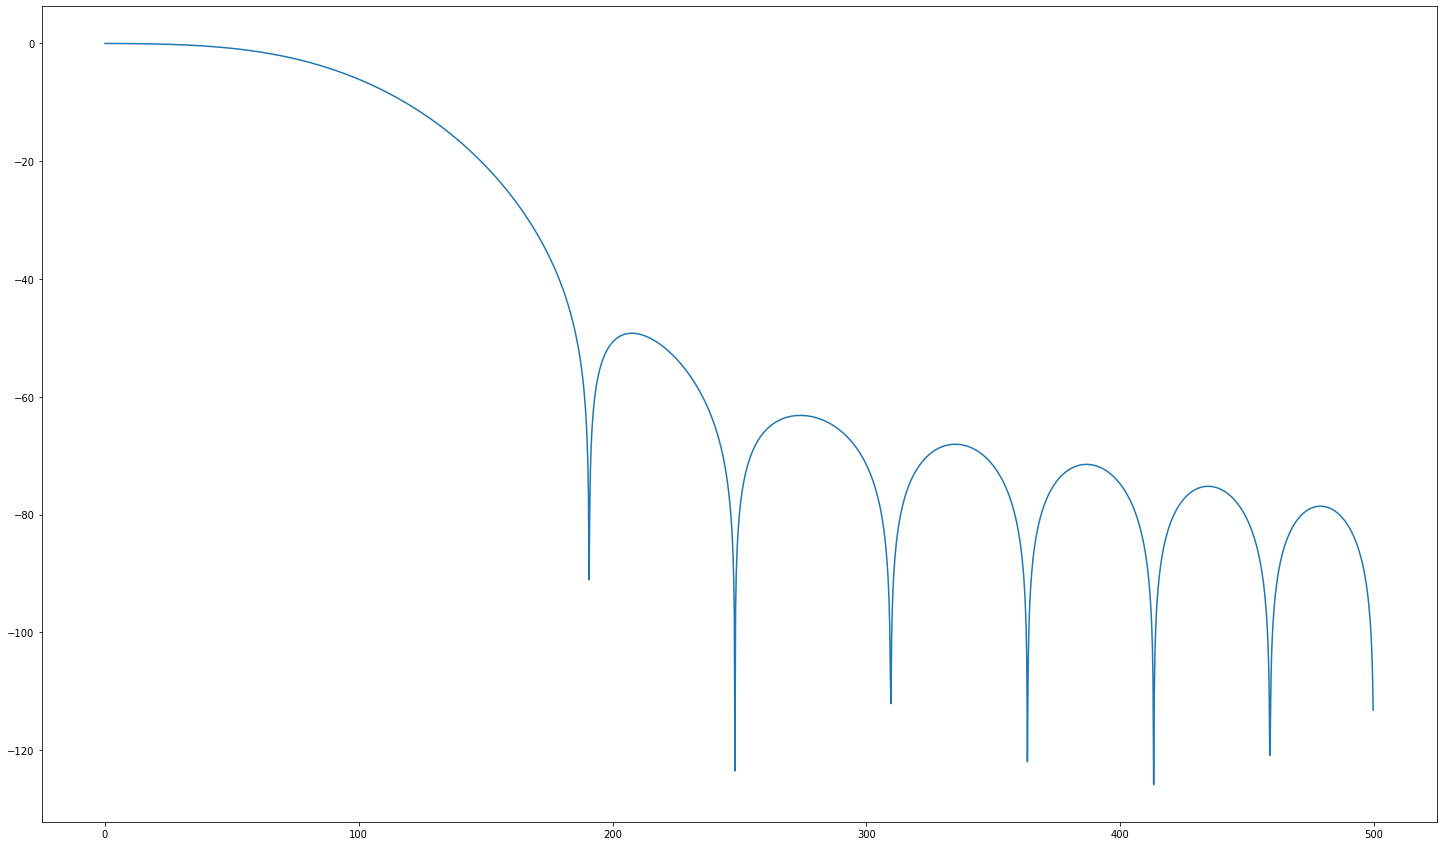

In [163]:
#FIR filter
N = 20 #no of coefficients
fc = 100 #cutoff freq
w_c = 2*fc/Fs
t = sig.firwin(N, w_c)

w,h = sig.freqz(t, worN = 2000) # get frequency response
w = Fs*w/(2*mt.pi) #to degrees

h_db = 20*np.log10(abs(h)) #to db

plt.figure(3)
plt.plot(w,h_db)
